In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib notebook
%matplotlib inline
from matplotlib import figure
import os 
from citipy import citipy
import json
import requests
from config import api_key
import random
from pprint import pprint
# import geopandas as gpd
# import geoplot as gplt

In [44]:
#In this module I create an object with all the cities in it
cities=[]
for i in range(1,50000):
    lt=random.randrange(-90,90,1)
    ln=random.randrange(-180,180,1)
    cities.append(citipy.nearest_city(lt, ln))

In [45]:
#A list of all the cities without duplicates
city_names=[]
for city in cities:
    city_names.append(city.city_name)
city_names

def remove(duplicates): 
    citiex = [] 
    for cityx in duplicates: 
        if cityx not in citiex: 
            citiex.append(cityx) 
    return citiex
final_cities=remove(city_names)

In [46]:
#The API is called 
weather_resp=[]
for i in range(0,len(final_cities)):
    url = "http://api.openweathermap.org/data/2.5/weather?"
    city = final_cities[i]
    query_url = url + "appid=" + "a013bd326ab1cd551e9064d36ed0db9b" + "&q=" + city
    response = requests.get(query_url).json()
    weather_resp.append(response)

In [47]:
df=pd.DataFrame.from_records(weather_resp)

In [48]:
#Some cities are not found in the OpenWeather website
df_final=df[df.cod==200].copy()
df_final=df_final.reset_index()

In [49]:
tempF=[]
lat=[]
lon=[]
hum=[]
cloud=[]
wind=[]
city_name=df_final["name"].tolist()
city_ID=df_final["id"].tolist()
i=0
for i in range(0,len(df_final)):
    var_temp=df_final["main"][i].get("temp")*(9/5)-459.67
    tempF.append(var_temp)
    var_cloud=df_final["clouds"][i].get("all")
    cloud.append(var_cloud)
    var_hum=df_final["main"][i].get("humidity")
    hum.append(var_hum)
    var_wind=df_final["wind"][i].get("speed")
    wind.append(var_wind)
    var_lat=df_final["coord"][i].get("lat")
#     if var_lat<0:
#         var_lat=var_lat*-1
    lat.append(var_lat)
    var_lon=df_final["coord"][i].get("lon")
    lon.append(var_lon)
    
data_dict={"City":city_name,"city_ID":city_ID,"latitud":lat,"longitud":lon,"Temperature_(F)":tempF,"Humidity":hum,
           "Wind_Speed":wind,"Cloudiness_(%)":cloud}
dataF=pd.DataFrame(data_dict)
dataF.head()

,City,city_ID,latitud,longitud,Temperature_(F),Humidity,Wind_Speed,Cloudiness_(%)
0,Broome,2656067.0,52.47,1.45,54.3380,82,4.6,0
1,Lebu,344979.0,8.96,38.73,59.0000,87,1.0,75
2,Albany,5106834.0,42.65,-73.75,75.8840,58,2.1,40
3,Faanui,4034551.0,-16.48,-151.75,79.9016,76,9.0,21
4,Bethel,5880568.0,60.79,-161.76,52.6820,66,3.1,90


In [52]:
stats=dataF.describe()
#stats=stats.drop(columns=["city_ID"])
stats


,city_ID,latitud,longitud,Temperature_(F),Humidity,Wind_Speed,Cloudiness_(%)
count,4.838000e+03,4838.000000,4838.000000,4838.000000,4838.000000,4838.000000,4838.000000
mean,2.509563e+06,23.507265,16.881447,68.215758,72.461141,2.981377,42.526457
std,1.651705e+06,28.634706,79.046613,12.880770,23.467008,2.120284,39.016009
min,1.417700e+04,-54.810000,-179.170000,25.001600,1.000000,0.050000,0.000000
25%,1.263548e+06,1.647500,-57.312500,57.581600,60.000000,1.500000,1.000000
50%,2.158221e+06,30.000000,23.685000,69.800000,78.000000,2.545000,40.000000
75%,3.522373e+06,47.130000,78.162500,77.921600,90.000000,4.000000,77.000000
max,8.142546e+06,78.220000,179.320000,108.104000,334.000000,15.170000,100.000000


Text(0.5, 0, 'Latitude')

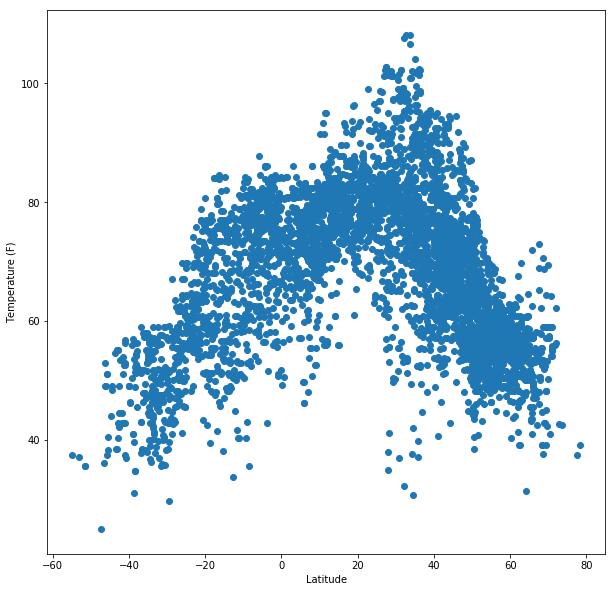

In [53]:
plt.figure(figsize=(10,10))
plt.scatter(lat,tempF)#,figsize=(6,6))
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")

Text(0.5, 0, 'Latitude')

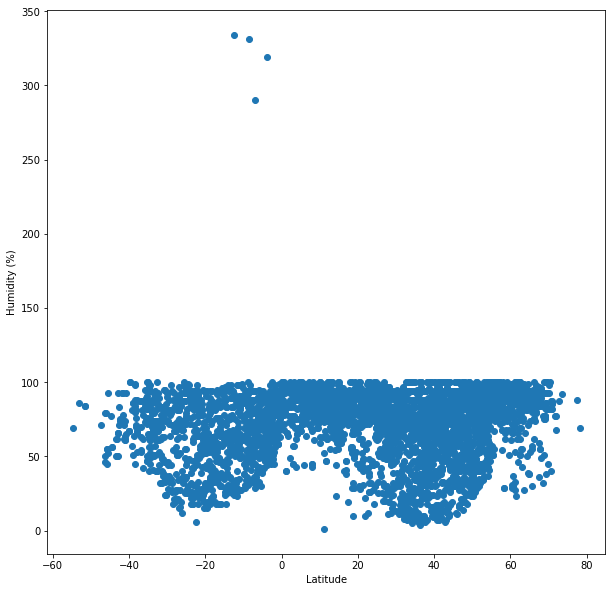

In [54]:
plt.figure(figsize=(10,10))
plt.scatter(lat,hum)
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")

Text(0.5, 0, 'Latitude')

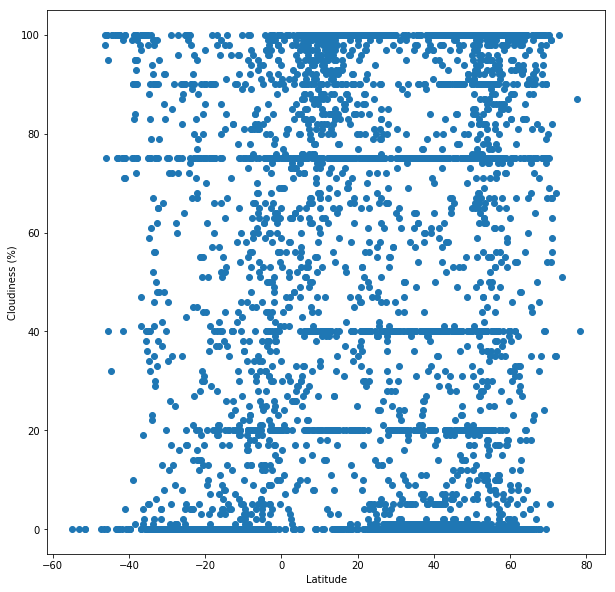

In [55]:
plt.figure(figsize=(10,10))
plt.scatter(lat,cloud)
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")

Text(0.5, 0, 'Latitude')

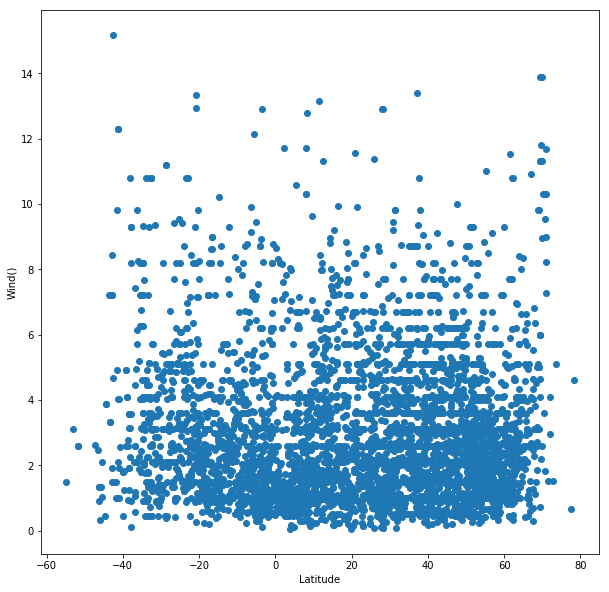

In [56]:
plt.figure(figsize=(10,10))
plt.scatter(lat,wind)
plt.ylabel("Wind()")
plt.xlabel("Latitude")


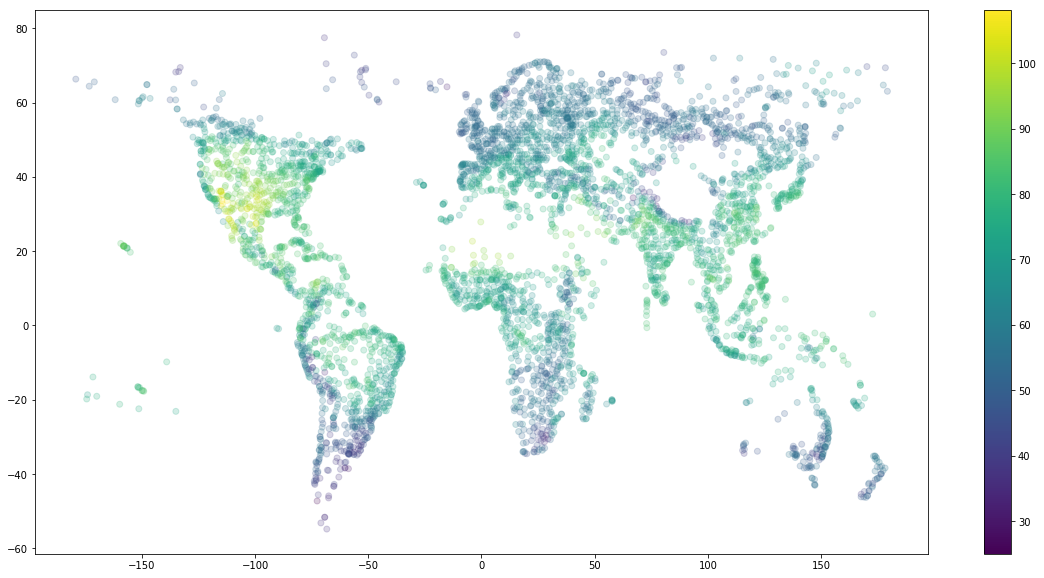

In [57]:
fig, ax = plt.subplots(figsize=(20,10))

cmap = matplotlib.cm.get_cmap('viridis')
normalize = matplotlib.colors.Normalize(vmin=min(dataF["Temperature_(F)"]), vmax=max(dataF["Temperature_(F)"]))
colors = [cmap(normalize(value)) for value in dataF["Temperature_(F)"]]

ax.scatter(x=dataF["longitud"],y=dataF["latitud"],alpha=0.2,color=colors)

cax, _ = matplotlib.colorbar.make_axes(ax)
cbar = matplotlib.colorbar.ColorbarBase(cax, cmap=cmap, norm=normalize)
